In [1]:
import pandas as pd
import ydf
from ydf import Task

In [2]:
data = pd.read_csv("./inputs/train.csv")

In [3]:
import numpy as np

def split_dataset(dataset, test_ratio=0.20):
    """
    Split into train and test sets (adjust as needed)
    :param dataset:
    :param test_ratio:
    :return: The train and test sets
    """
    test_indices = np.random.rand(len(dataset)) < test_ratio
    return dataset[~test_indices], dataset[test_indices]

In [4]:
train_data, test_data = split_dataset(data)
print("{} examples in training, {} examples in testing.".format(
    len(train_data), len(test_data)))

600239 examples in training, 149761 examples in testing.


In [5]:
# Define the label column
label = "Calories"

In [6]:
# Initialize the learner (regression task shown here)
learner = ydf.RandomForestLearner(label=label, task=Task.REGRESSION)

In [7]:
# Train the model
model = learner.train(train_data)

Train model on 600239 examples
Model trained in 0:05:47.813648


In [10]:
# Evaluate on the test set
evaluation = model.evaluate(test_data)

# For regression, print RMSE
print("Root Mean Squared Error (RMSE):", evaluation.rmse)

Root Mean Squared Error (RMSE): 3.723612490435879


In [12]:
from sklearn.metrics import root_mean_squared_log_error

# Predict on the test set
predictions = model.predict(test_data)

# Extract true labels
true_values = test_data["Calories"]  # Replace "price" with your label column name

# Compute RMSLE
rmsle = root_mean_squared_log_error(true_values, predictions)
print("Root Mean Squared Logarithmic Error (RMSLE):", rmsle)

Root Mean Squared Logarithmic Error (RMSLE): 0.06140741111246736


In [14]:
model.variable_importances()["NUM_AS_ROOT"]

[(158.0, 'Duration'),
 (81.0, 'Heart_Rate'),
 (45.0, 'Body_Temp'),
 (14.0, 'Age'),
 (2.0, 'Weight')]

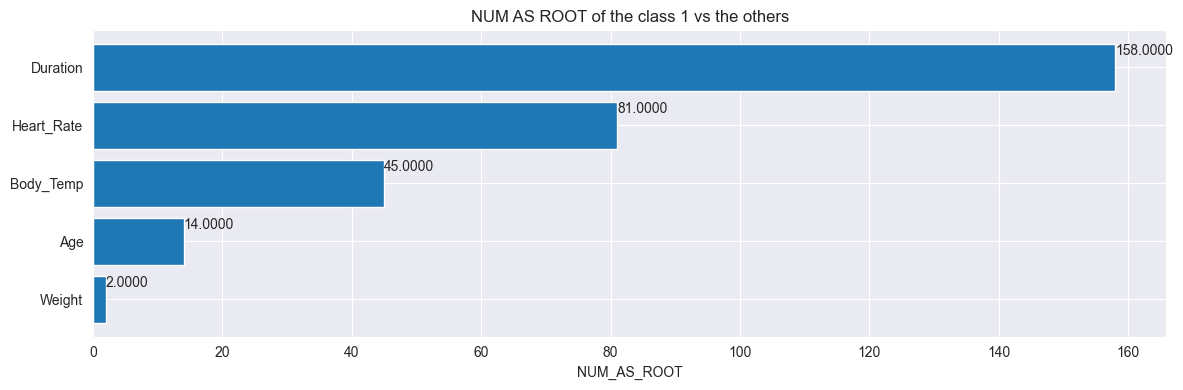

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Mean decrease in AUC of the class 1 vs the others.
variable_importance_metric = "NUM_AS_ROOT"
variable_importances = model.variable_importances()[variable_importance_metric]

# Extract the feature name and importance values.
#
# `variable_importances` is a list of <feature, importance> tuples.
feature_names = [vi[1] for vi in variable_importances]
feature_importances = [vi[0] for vi in variable_importances]

# The features are ordered in decreasing importance value.
feature_ranks = range(len(feature_names))

bar = plt.barh(feature_ranks, feature_importances, label=[str(x) for x in feature_ranks])
plt.yticks(feature_ranks, feature_names)
plt.gca().invert_yaxis()

# TODO: Replace with "plt.bar_label()" when available.
# Label each bar with values
for importance, patch in zip(feature_importances, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{importance:.4f}", va="top")

plt.xlabel(variable_importance_metric)
plt.title("NUM AS ROOT of the class 1 vs the others")
plt.tight_layout()
plt.show()